In [33]:
import numpy as np
import pandas as pd

In [34]:
data = pd.read_csv("C:\\Users\\prava\\Downloads\\housing.csv")

In [35]:
data.head()

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0


In [36]:
X = np.array(data[['RM', 'LSTAT', 'PTRATIO']])

In [37]:
X[:5]

array([[ 6.575,  4.98 , 15.3  ],
       [ 6.421,  9.14 , 17.8  ],
       [ 7.185,  4.03 , 17.8  ],
       [ 6.998,  2.94 , 18.7  ],
       [ 7.147,  5.33 , 18.7  ]])

In [38]:
X2 = np.array(data.iloc[:, :-1])

In [39]:
X2

array([[ 6.575,  4.98 , 15.3  ],
       [ 6.421,  9.14 , 17.8  ],
       [ 7.185,  4.03 , 17.8  ],
       ...,
       [ 6.976,  5.64 , 21.   ],
       [ 6.794,  6.48 , 21.   ],
       [ 6.03 ,  7.88 , 21.   ]])

In [40]:
X2.shape

(489, 3)

In [41]:
X.shape

(489, 3)

In [42]:
y = np.array(data.iloc[:, -1])

In [43]:
y[:5]

array([504000., 453600., 728700., 701400., 760200.])

In [44]:
df_features = data.drop('MEDV', axis = 1)

In [45]:
df_features

,RM,LSTAT,PTRATIO
0,6.575,4.98,15.3
1,6.421,9.14,17.8
2,7.185,4.03,17.8
3,6.998,2.94,18.7
4,7.147,5.33,18.7
...,...,...,...
484,6.593,9.67,21.0
485,6.120,9.08,21.0
486,6.976,5.64,21.0
487,6.794,6.48,21.0


In [46]:
df_target = data['MEDV']

In [47]:
price_mean = df_target.mean()
price_mean

454342.9447852761

In [48]:
price_min = df_target.min()
price_min

105000.0

In [49]:
price_max = df_target.max()
price_max

1024800.0

In [50]:
price_median = df_target.median()
price_median

438900.0

In [51]:
repeat_price = df_target.value_counts().idxmax
repeat_price

<bound method Series.idxmax of 525000.0    8
485100.0    7
462000.0    7
455700.0    7
407400.0    6
           ..
690900.0    1
726600.0    1
636300.0    1
699300.0    1
170100.0    1
Name: MEDV, Length: 228, dtype: int64>

In [52]:
from sklearn.metrics import r2_score
def performance_metric(y_true, y_predict):
    score = r2_score(y_true, y_predict)
    return score

In [53]:
score = performance_metric([3, -0.5, 2, 7, 4.2], [2.5, 0.0, 2.1, 7.8, 5.3])
print("Model has a coefficient of determination, R^2, of {:.3f}.".format(score))

Model has a coefficient of determination, R^2, of 0.923.


In [54]:
#the r2_score with 0.923 says that 92 percent of variance in y is predicted from x

In [55]:
# to shuffle and split
def randomize(X, y):
    perm = np.random.permutation(y.shape[0])
    X2 = X[perm, :]
    y2 = y[perm]
    return X2, y2

X2, y2 = randomize(X, y)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X2, y2, random_state = 1, test_size = 0.2)

In [56]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(391, 3) (98, 3) (391,) (98,)


In [57]:
import matplotlib.pyplot as plt

In [58]:
from sklearn.model_selection import validation_curve

def plot_validation_curve( estimator,X2, y2, param_name, param_range, cv):
    train_scores, test_scores = validation_curve(estimator, X2, y2,param_name =  param_name,param_range =  param_range, cv = cv)
    train_mean = np.mean(train_scores, axis = 1)
    test_mean = np.mean(test_scores, axis = 1)
    plt.plot(param_range ,train_mean, 'o-', color = 'g', label = "train_score")
    plt.plot(param_range, test_mean, 'o-', color = 'b', label = "val score")
    plt.ylim(0,1)
    plt.legend()
    plt.title(estimator)
    plt.show()

C:\Users\prava\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(


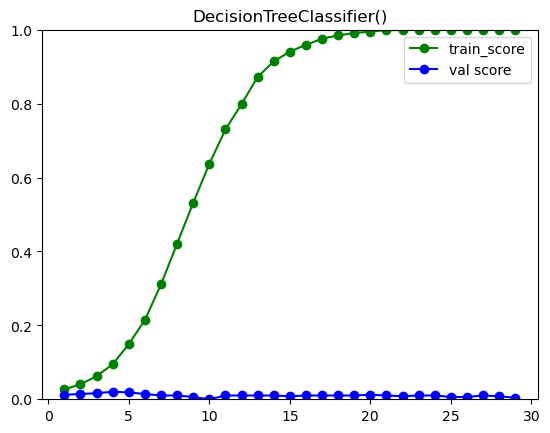

In [59]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
plot_validation_curve(clf,X2,  y2, 'max_depth' , list(range(30)), 3)

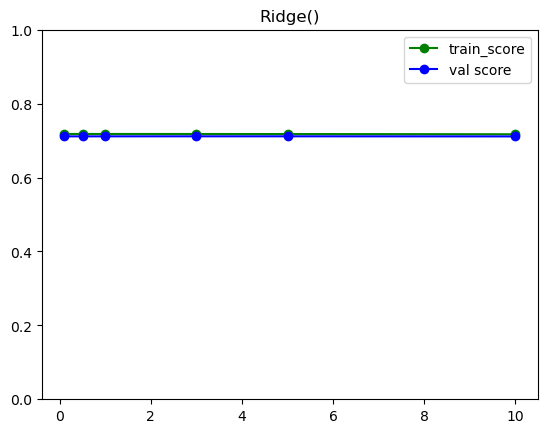

In [60]:
from sklearn.linear_model import Ridge
rid = Ridge()
plot_validation_curve(rid, X2, y2, 'alpha', [0.1, 0.5, 1, 3, 5, 10], 3)

In [65]:

from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

clf1 = Ridge()
param_grid1 ={'alpha':[0.1, 0.3, 0.5, 1.0, 5, 10]}
clf2 = DecisionTreeRegressor()
param_grid2 = {'max_depth':[2, 4, 5, 6, 7, 8, 9, 10]}
clf3 = SVR(kernel = 'poly')
param_grid3 = {'C':[0.1, 0.3, 0.5, 1, 2, 4, 6, 10, 30, 50, 100]}


In [66]:
estimators = {clf1 :(clf1, param_grid1),clf2 :(clf2, param_grid2), clf3 :(clf3, param_grid3)  }

In [67]:
estimators.items()

dict_items([(Ridge(), (Ridge(), {'alpha': [0.1, 0.3, 0.5, 1.0, 5, 10]})), (DecisionTreeRegressor(), (DecisionTreeRegressor(), {'max_depth': [2, 4, 5, 6, 7, 8, 9, 10]})), (SVR(kernel='poly'), (SVR(kernel='poly'), {'C': [0.1, 0.3, 0.5, 1, 2, 4, 6, 10, 30, 50, 100]}))])

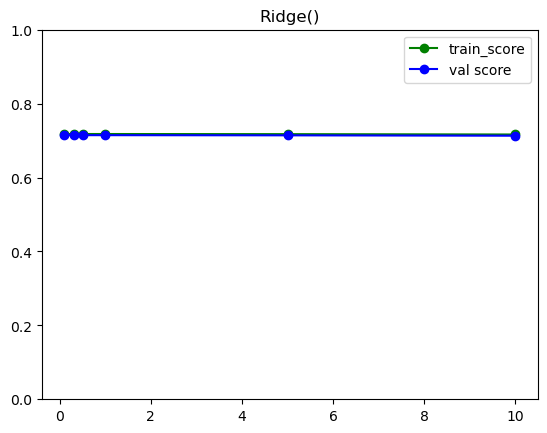

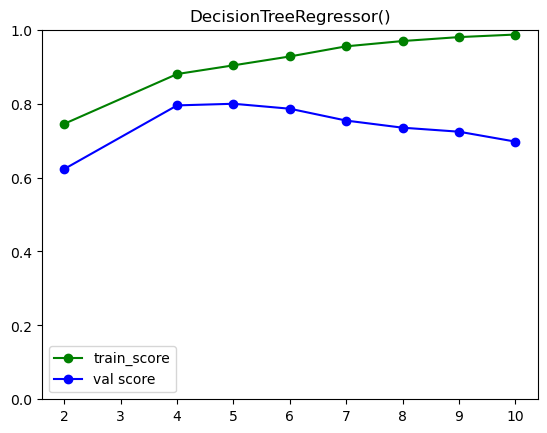

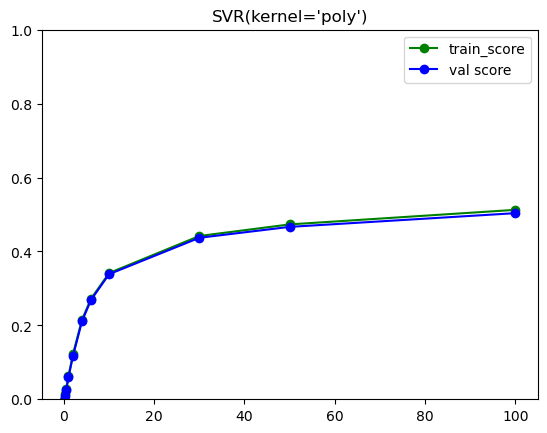

In [68]:
for x, (y,z) in estimators.items():
    for [a, b] in z.items():
        plot_validation_curve(y, X2, y2, a, b, 2)